In [1]:
#Basic libraries
import warnings
import tensorflow as ts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score, precision_score,recall_score,f1_score

In [3]:
# Load the diabetes dataset
dataset= pd.read_csv('D:/PhD/Data Science/final_dataset.csv', sep = ',', index_col = 'id')

In [4]:
# Assume that 'Diabetes_012' is the target variable
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize the StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Iterate over the splits
for train_index, test_index in stratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
print("Accuracy Score:", round(accuracy_score(y_test, dt_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, dt_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

Accuracy Score: 77.14
precision score: 75.48
recall score: 77.14
Roc curve: 90.48
f1 score: 76.25


In [9]:
# permutation_importance

In [10]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(dt_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)


Permutation Importance:
                 Feature  Importance
14               GenHlth    0.012642
17                   Age    0.008315
3                    BMI    0.006518
19                Income    0.005230
15              DiffWalk    0.004813
1               HighChol    0.003540
6   HeartDiseaseorAttack    0.002609
16                   Sex    0.002324
8                 Fruits    0.001984
0                 HighBP    0.001865
18             Education    0.001639
13          health_issue    0.001527
7           PhysActivity    0.001441
12           NoDocbcCost    0.000815
11         AnyHealthcare    0.000723
9                Veggies    0.000609
10     HvyAlcoholConsump    0.000504
5                 Stroke    0.000239
2              CholCheck    0.000009
4                 Smoker   -0.000509


In [11]:
# Decomposition Methods

In [12]:
from treeinterpreter import treeinterpreter as ti
# Use TreeInterpreter to interpret predictions
prediction, bias, contributions = ti.predict(dt_model, X_test)
# Display the contributions of each feature for a specific instance (e.g., the first instance)
instance_index = 0
instance_contributions = contributions[instance_index]
instance_features = X_test.iloc[instance_index]
# Convert instance_features to a DataFrame with a single column
contributions_df = pd.DataFrame({'Feature': instance_features.index, 'Contribution': instance_features.values})
contributions_df = contributions_df.sort_values(by='Contribution', ascending=False)
# Display the contributions for the chosen instance
print("\nFeature Contributions for a Specific Instance:")
print(contributions_df)


Feature Contributions for a Specific Instance:
                 Feature  Contribution
17                   Age             9
3                    BMI             3
18             Education             3
14               GenHlth             3
0                 HighBP             1
13          health_issue             1
2              CholCheck             1
4                 Smoker             1
9                Veggies             1
1               HighChol             1
11         AnyHealthcare             1
16                   Sex             0
15              DiffWalk             0
10     HvyAlcoholConsump             0
12           NoDocbcCost             0
8                 Fruits             0
7           PhysActivity             0
6   HeartDiseaseorAttack             0
5                 Stroke             0
19                Income             0


In [13]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [14]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

Original Accuracy: 0.7713614714339018


In [15]:
# Iterate through each feature and evaluate the model after leaving out each feature
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, dt_model.predict(X_test_loco))
    print(f"Accuracy with remaining features after LOCO for {feature}: {loco_accuracy[feature]}")

Accuracy with remaining features after LOCO for HighBP: 0.7829064331336011
Accuracy with remaining features after LOCO for HighChol: 0.7724808498496522
Accuracy with remaining features after LOCO for CholCheck: 0.7711639340664165
Accuracy with remaining features after LOCO for BMI: 0.7779241017536929
Accuracy with remaining features after LOCO for Smoker: 0.775246372994447
Accuracy with remaining features after LOCO for Stroke: 0.7734246394943043
Accuracy with remaining features after LOCO for HeartDiseaseorAttack: 0.7745220693136674
Accuracy with remaining features after LOCO for PhysActivity: 0.7760804196571629
Accuracy with remaining features after LOCO for Fruits: 0.7766510831632317
Accuracy with remaining features after LOCO for Veggies: 0.7763877000065845
Accuracy with remaining features after LOCO for HvyAlcoholConsump: 0.7715590088013872
Accuracy with remaining features after LOCO for AnyHealthcare: 0.7722613638857795
Accuracy with remaining features after LOCO for NoDocbcCost:

In [16]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")


LOCO Accuracies:
HighBP: Impact = -0.011544961699699319
HighChol: Impact = -0.0011193784157503828
CholCheck: Impact = 0.00019753736748528983
BMI: Impact = -0.006562630319791096
Smoker: Impact = -0.0038849015605452175
Stroke: Impact = -0.0020631680604025204
HeartDiseaseorAttack: Impact = -0.0031605978797656364
PhysActivity: Impact = -0.004718948223261132
Fruits: Impact = -0.005289611729329957
Veggies: Impact = -0.005026228572682756
HvyAlcoholConsump: Impact = -0.00019753736748540085
AnyHealthcare: Impact = -0.0008998924518777152
NoDocbcCost: Impact = -0.0033361866508636595
health_issue: Impact = -0.003753209982221617
GenHlth: Impact = -0.004038541735256085
DiffWalk: Impact = -0.00546520050042798
Sex: Impact = -0.004587256644937643
Age: Impact = -0.005245714536555424
Education: Impact = -0.0033142380544765038
Income: Impact = -0.004543359452163109


In [17]:
# Scenario 2: Removal-Based Explanations

In [18]:
# Iterate through each feature and evaluate the model after removing each feature
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0 # Replace the feature with a constant (e.g., 0)
    removal_accuracy[feature] = accuracy_score(y_test, dt_model.predict(X_test_removed))
    print(f"Accuracy with remaining features after Removal for {feature}: {removal_accuracy[feature]}")

Accuracy with remaining features after Removal for HighBP: 0.7829064331336011
Accuracy with remaining features after Removal for HighChol: 0.7813041855973311
Accuracy with remaining features after Removal for CholCheck: 0.776256008428261
Accuracy with remaining features after Removal for BMI: 0.7652817102346305
Accuracy with remaining features after Removal for Smoker: 0.7716907003797108
Accuracy with remaining features after Removal for Stroke: 0.7734465880906916
Accuracy with remaining features after Removal for HeartDiseaseorAttack: 0.7741708917714712
Accuracy with remaining features after Removal for PhysActivity: 0.756743706239986
Accuracy with remaining features after Removal for Fruits: 0.7612212199029872
Accuracy with remaining features after Removal for Veggies: 0.7524198327516955
Accuracy with remaining features after Removal for HvyAlcoholConsump: 0.771207831259191
Accuracy with remaining features after Removal for AnyHealthcare: 0.7412918943833542
Accuracy with remaining fe

In [19]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")


Removal-Based Explanations Accuracies:
HighBP: Impact = -0.011544961699699319
HighChol: Impact = -0.00994271416342929
CholCheck: Impact = -0.0048945369943592665
BMI: Impact = 0.0060797611992712275
Smoker: Impact = -0.0003292289458090014
Stroke: Impact = -0.002085116656789787
HeartDiseaseorAttack: Impact = -0.0028094203375694793
PhysActivity: Impact = 0.014617765193915777
Fruits: Impact = 0.010140251530914579
Veggies: Impact = 0.01894163868220622
HvyAlcoholConsump: Impact = 0.0001536401747107563
AnyHealthcare: Impact = 0.03006957705054758
NoDocbcCost: Impact = -0.0026118829700840784
health_issue: Impact = 0.0018875792893043863
GenHlth: Impact = -0.017361339742323567
DiffWalk: Impact = -0.0017119905182063633
Sex: Impact = -0.0027216259520204122
Age: Impact = -0.00994271416342929
Education: Impact = 0.06736024231250404
Income: Impact = 0.03353745527973484


# SHAP

In [20]:
#Importing shap module
import shap
#intialize JS visualization
shap.initjs()

In [21]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = dt_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [22]:
#We will use below rows for prediction explanations using lime and shap
row = [100, 150,200, 250,300]

for row : 100  the real value is  0


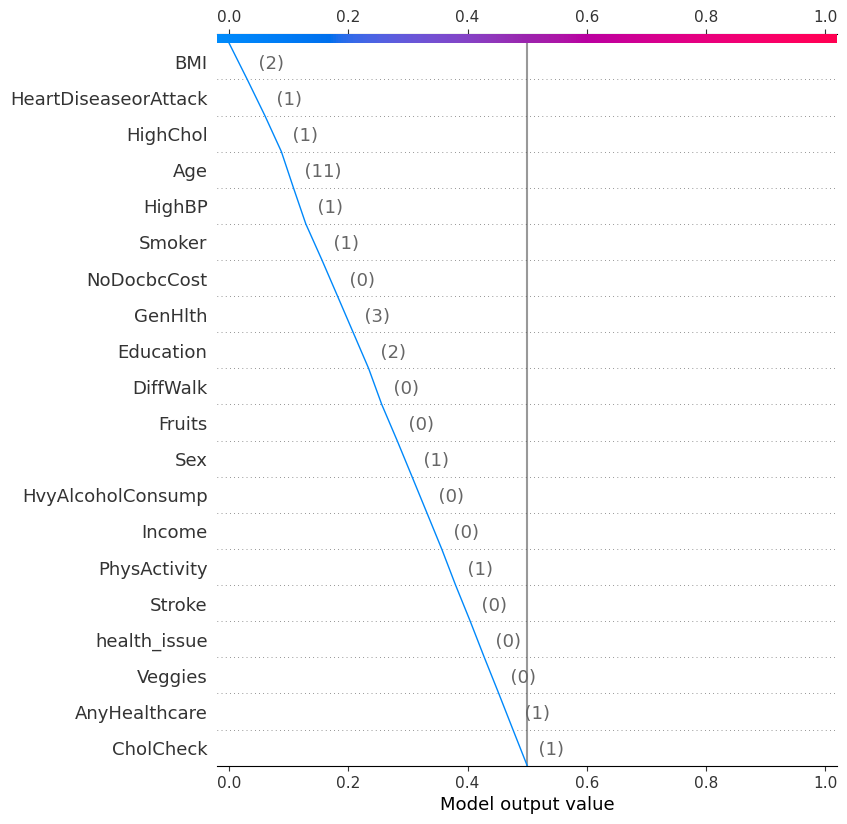

for row : 150  the real value is  0


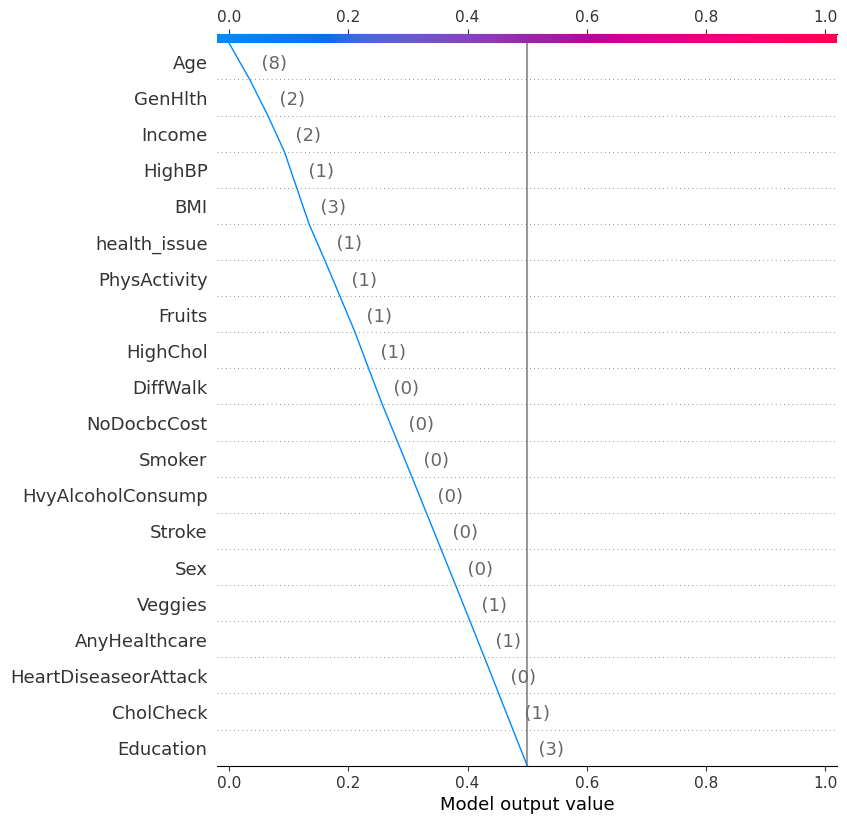

for row : 200  the real value is  0


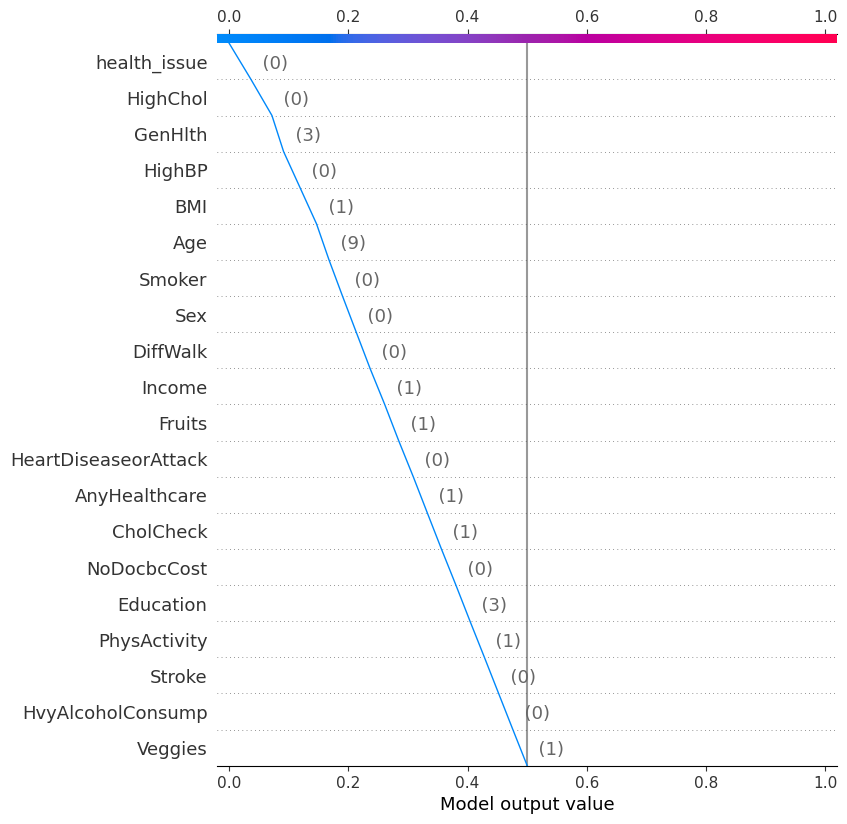

for row : 250  the real value is  0


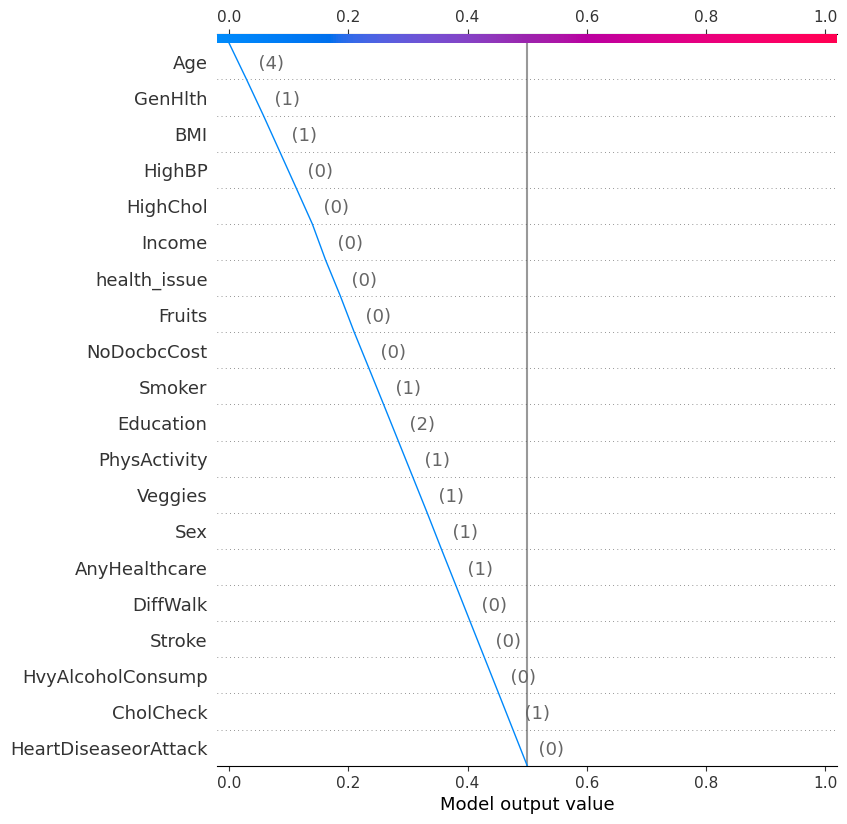

for row : 300  the real value is  2


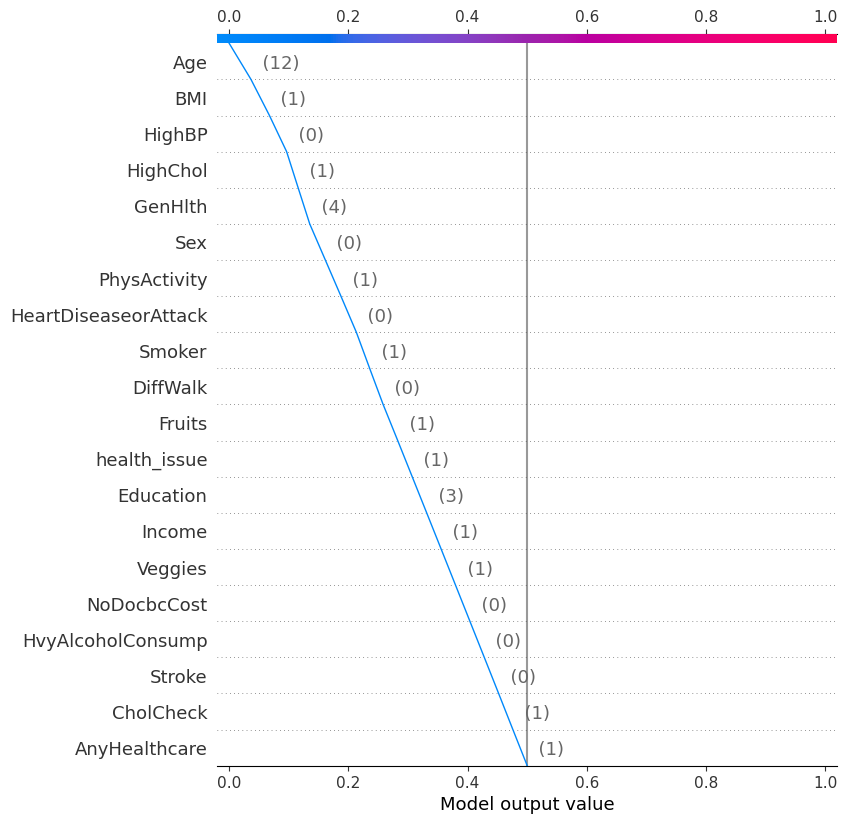

In [23]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

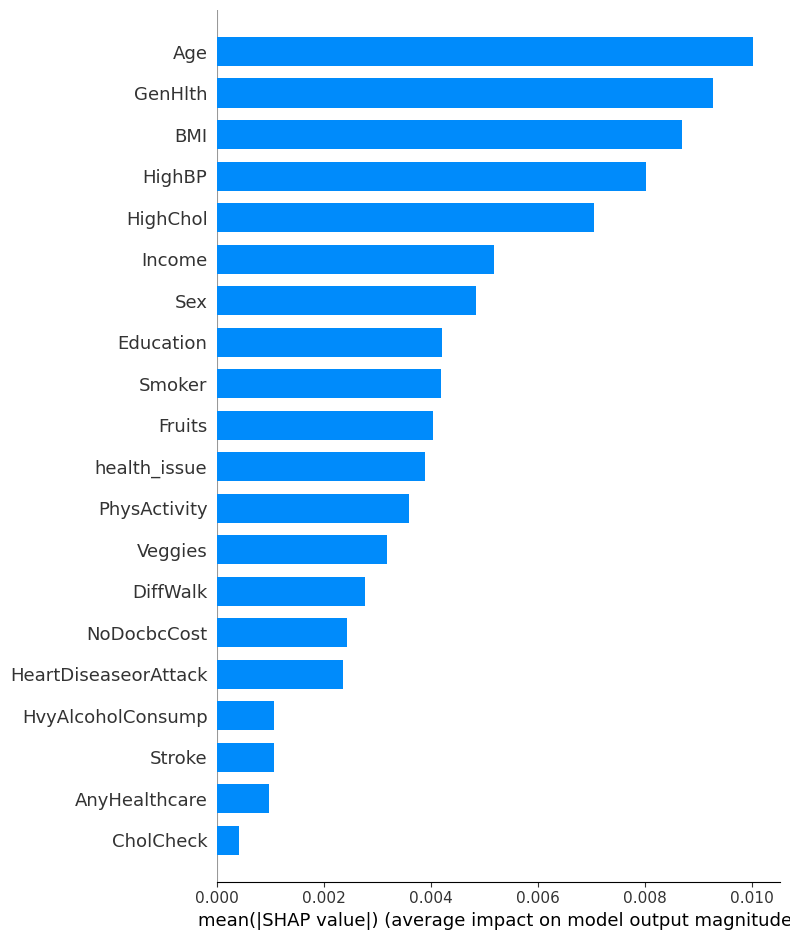

In [24]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
import lime
import lime.lime_tabular
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],
)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], dt_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
# Assuming lgb_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)
# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], dt_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], dt_model.predict_proba(X)[:, i])
# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek
Resample= SMOTETomek(sampling_strategy='not minority',random_state=10)
X_train,y_train=Resample.fit_resample(X_train,y_train)

In [ ]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

In [ ]:
print("Accuracy Score:", round(accuracy_score(y_test, dt_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, dt_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

In [ ]:
# permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(dt_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)

In [ ]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [ ]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

In [ ]:
# Iterate through each feature and evaluate the model after leaving out each feature
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, dt_model.predict(X_test_loco))
    print(f"Accuracy with remaining features after LOCO for {feature}: {loco_accuracy[feature]}")

In [ ]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
# Scenario 2: Removal-Based Explanations

In [ ]:
# Iterate through each feature and evaluate the model after removing each feature
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0 # Replace the feature with a constant (e.g., 0)
    removal_accuracy[feature] = accuracy_score(y_test, dt_model.predict(X_test_removed))
    print(f"Accuracy with remaining features after Removal for {feature}: {removal_accuracy[feature]}")

In [ ]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

# SHAP

In [ ]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = dt_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

In [ ]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
import lime
import lime.lime_tabular
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],

)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], dt_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
# Assuming lgb_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)
# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], dt_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], dt_model.predict_proba(X)[:, i])
# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()